
<h1>Welcome to my Game of Thrones Analysis</h1>

<p>Below is my first Kaggle project. This project will consist of the use of the following datasets:</p>

<ul>
    <li>
        <a href="https://github.com/chrisalbon/war_of_the_five_kings_dataset">battles.csv</a> represent data related to the War of the Five Kings from George R.R. Martin's A Song Of Ice And Fire series.
    </li>
    <li>
         <a href="https://github.com/benkahle/bayesianGameofThrones">character-deaths.csv</a> is data related to a <a href="http://allendowney.blogspot.com/2015/03/bayesian-survival-analysis-for-game-of.html">Bayesian Survival Analysis</a> of Game of Thrones.
    </li>
    <li>
        <a href="https://www.kaggle.com/mylesoneill/game-of-thrones">character-predictions.csv</a> is data scraped from <a href="http://awoiaf.westeros.org/index.php/Main_Page">a wiki</a> that covers some predictions, and <a href="https://got.show/machine-learning-algorithm-predicts-death-game-of-thrones">here</a> is the methodolgy that may or may not be covered here.
    </li>
</ul>

<br>

<h2>1: Load Data</h2>

In [1]:
import os
import pandas as pd
import numpy as np
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import *
import matplotlib.pyplot as mplt

#go offline with plotly
init_notebook_mode(connected=True) 

#set working directory
WRKSPC = 'C:\\Users\\Chris\\Analytics\\gameofthrones_analysis\\'

#loading data as dataframes
battles = pd.read_csv(WRKSPC+'battles.csv')
deaths = pd.read_csv(WRKSPC+'character-deaths.csv')
predictions = pd.read_csv(WRKSPC+'character-predictions.csv')



<h3>Battles: A Preliminary Summary</h3>
<ul>
<li>
<a href="https://github.com/christopherpryer/gameofthrones_analysis/blob/master/battles.csv">battles.csv</a> contains the name of each battle, the year it happened, who was attacking (along with a somewhat more granular level of who was involved), who consisted of the defense, house related to each side, count of deaths and major deaths, captures, sizes, region, some notes, and seasonality.
</li>
<li>
Just looking at the data the first areas I'd like to address are the significance of vital factors regarding each side's parameters.
</li>
<li>
It is also worth noting that this data set paints a higher level picture of some deaths. It is a smaller set of data but in some ways this might be worth comming back to for some relations with other data.
</li>
</ul>

In [2]:
#print battles
battles.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [3]:
print battles.shape

(38, 25)


In [4]:
#print battles.describe()
battles.describe()

,year,battle_number,defender_3,defender_4,major_death,major_capture,attacker_size,defender_size,summer
count,38.000000,38.000000,0.0,0.0,37.000000,37.000000,24.000000,19.000000,37.000000
mean,299.105263,19.500000,NaN,NaN,0.351351,0.297297,9942.541667,6428.157895,0.702703
std,0.689280,11.113055,NaN,NaN,0.483978,0.463373,20283.092065,6225.182106,0.463373
min,298.000000,1.000000,NaN,NaN,0.000000,0.000000,20.000000,100.000000,0.000000
25%,299.000000,10.250000,NaN,NaN,0.000000,0.000000,1375.000000,1070.000000,0.000000
50%,299.000000,19.500000,NaN,NaN,0.000000,0.000000,4000.000000,6000.000000,1.000000
75%,300.000000,28.750000,NaN,NaN,1.000000,1.000000,8250.000000,10000.000000,1.000000
max,300.000000,38.000000,NaN,NaN,1.000000,1.000000,100000.000000,20000.000000,1.000000


<h3>Deaths: A Preliminary Summary</h3>
<ul>
<li>
<a href="https://github.com/christopherpryer/gameofthrones_analysis/blob/master/character-deaths.csv">character-deaths.csv</a> contains the name of the character, allegiance to what house, death year, book they died in, chapter in which they died, gender, nobility, GoT appearance, and a each book they appeared in. 
</li>
<li>
Off the bat the scale of this file will allow me to get a feel for prevelence of death in both the series and the books. There might be relations with the frequency of death and a certain house.
</li>
<li>
There isn't too much depth, at least at first glance. The file just states when and if someone died (maybe how many times they died too -- we'll cover this later).
</li>
</ul>

In [5]:
#print deaths
deaths.head()

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0


In [6]:
print deaths.shape

(917, 13)


In [7]:
#print deaths.describe()
deaths.describe()

,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
count,305.000000,307.000000,299.000000,905.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,299.157377,2.928339,40.070234,28.861878,0.828790,0.468920,0.272628,0.353326,0.424209,0.272628,0.284624
std,0.703483,1.326482,20.470270,20.165788,0.376898,0.499305,0.445554,0.478264,0.494492,0.445554,0.451481
min,297.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,299.000000,2.000000,25.500000,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,299.000000,3.000000,39.000000,27.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,300.000000,4.000000,57.000000,43.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,300.000000,5.000000,80.000000,80.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<h3>Predictions: A Preliminary Summary</h3>
<ul>
<li>
<a href="https://github.com/christopherpryer/gameofthrones_analysis/blob/master/character-predictions.csv">character-predictions.csv</a> contains more interesting data. This will need more than a high level glance.
</li>
</ul>

In [8]:
#print predictions
predictions.head()

,S.No,actual,pred,alive,plod,name,title,male,culture,dateOfBirth,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,1,0,0,0.054,0.946,Viserys II Targaryen,NaN,1,NaN,NaN,...,0.0,NaN,0,0,NaN,11,1,1,0.605351,0
1,2,1,0,0.387,0.613,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,...,NaN,1.0,1,1,97.0,1,1,1,0.896321,1
2,3,1,0,0.493,0.507,Addison Hill,Ser,1,NaN,NaN,...,NaN,NaN,0,1,NaN,0,0,0,0.267559,1
3,4,0,0,0.076,0.924,Aemma Arryn,Queen,0,NaN,82.0,...,NaN,0.0,1,1,23.0,0,0,0,0.183946,0
4,5,1,1,0.617,0.383,Sylva Santagar,Greenstone,0,Dornish,276.0,...,NaN,1.0,1,1,29.0,0,0,0,0.043478,1


In [9]:
print predictions.shape

(1946, 33)


In [10]:
#print predictions.describe()
predictions.describe()

,S.No,actual,pred,alive,plod,male,dateOfBirth,DateoFdeath,book1,book2,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
count,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,433.000000,444.000000,1946.000000,1946.000000,...,23.000000,276.000000,1946.000000,1946.000000,433.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000
mean,973.500000,0.745632,0.687050,0.634470,0.365530,0.619219,1577.364896,2950.193694,0.198356,0.374615,...,0.652174,0.778986,0.141829,0.460946,-1293.563510,0.305755,0.074512,0.059096,0.089584,0.745632
std,561.906131,0.435617,0.463813,0.312637,0.312637,0.485704,19565.414460,28192.245529,0.398864,0.484148,...,0.486985,0.415684,0.348965,0.498601,19564.340993,1.383910,0.262669,0.235864,0.160568,0.435617
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-28.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-298001.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,487.250000,0.000000,0.000000,0.391250,0.101000,0.000000,240.000000,282.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.013378,0.000000
50%,973.500000,1.000000,1.000000,0.735500,0.264500,1.000000,268.000000,299.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.033445,1.000000
75%,1459.750000,1.000000,1.000000,0.899000,0.608750,1.000000,285.000000,299.000000,0.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,50.000000,0.000000,0.000000,0.000000,0.086957,1.000000
max,1946.000000,1.000000,1.000000,1.000000,1.000000,1.000000,298299.000000,298299.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,100.000000,15.000000,1.000000,1.000000,1.000000,1.000000


<h1>2: Exploring the data</h1>
<br>

<h3>Battles</h3>

<p>Let's count the number of commanders listed as the attackers and see if there is a relation between this field and the factor that is scale of a side. First I'll print the attacking commanders for each battle where attacker size is null or attacking commander is null.</p>

In [11]:
battles_w_nulls = battles[pd.isnull(battles['attacker_size']) | pd.isnull(battles['attacker_commander'])]
battles_w_nulls[['name', 'attacker_commander']]

,name,attacker_commander
1,Battle at the Mummer's Ford,Gregor Clegane
6,Sack of Darry,Gregor Clegane
7,Battle of Moat Cailin,Victarion Greyjoy
12,Sack of Torrhen's Square,Dagmer Cleftjaw
20,Siege of Darry,Helman Tallhart
22,Battle of the Burning Septry,NaN
23,Battle of the Ruby Ford,Gregor Clegane
24,Retaking of Harrenhal,Gregor Clegane
26,Siege of Seagard,Walder Frey
28,Fall of Moat Cailin,Ramsey Bolton


<p>These records are going to have to be left out of the analysis, so let's create a new dataframe without them</p>

In [12]:
#assign a new df for clean battles data
battles_df = battles[battles.attacker_size.notnull() & battles.attacker_commander.notnull()]
battles_df[['name','attacker_size','attacker_commander']]

,name,attacker_size,attacker_commander
0,Battle of the Golden Tooth,15000.0,Jaime Lannister
2,Battle of Riverrun,15000.0,"Jaime Lannister, Andros Brax"
3,Battle of the Green Fork,18000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H..."
4,Battle of the Whispering Wood,1875.0,"Robb Stark, Brynden Tully"
5,Battle of the Camps,6000.0,"Robb Stark, Tytos Blackwood, Brynden Tully"
8,Battle of Deepwood Motte,1000.0,Asha Greyjoy
9,Battle of the Stony Shore,264.0,Theon Greyjoy
10,Battle of Torrhen's Square,244.0,"Rodrik Cassel, Cley Cerwyn"
11,Battle of Winterfell,20.0,Theon Greyjoy
13,Sack of Winterfell,618.0,"Ramsay Snow, Theon Greyjoy"


<p>To loosely verify we are working with the right data, let's see if our subsets add up</p>

In [13]:
#length of the original should equal that of with and without nulls combined
print 'Actual:', len(battles)
print len(battles)==len(battles_df)+len(battles_w_nulls), len(battles_df), '+', len(battles_w_nulls), '=', len(battles_df)+len(battles_w_nulls)

Actual: 38
True 24 + 14 = 38


<p>Moving on we can now plot the two variables. To do this we add a column to our data that is the cound of attacking commanders</p>


C:\Users\Chris\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



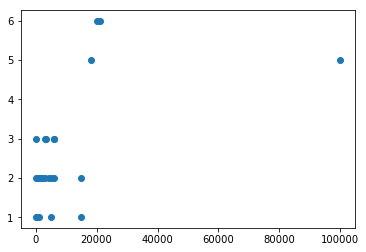

In [14]:
#REMINDER: as a learning assignment, figure out how to do this with the appropriate method 
battles_df['attacking_com_count'] = battles_df.apply(lambda row: len(row['attacker_commander'].split(',')), axis=1)

#sort
battles_df = battles_df.sort_values('attacker_size')

x=battles_df['attacker_size'].tolist()
y=battles_df['attacking_com_count'].tolist()

mplt.scatter(x, y)
mplt.show()